In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
from shapely.geometry import Point
import numpy as np
%matplotlib inline

In [2]:
may_pickle = pd.read_pickle("../data/may.pkl")
may_pickle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20283582 entries, 0 to 20283581
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 928.5+ MB


In [3]:
census = gpd.read_file('../data/davidson_bgroups/davidson_bgroups.shp')
census.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long,geometry
0,47,037,015402,3,470370154023,1262130,0,+36.2085813,-086.6273518,"POLYGON ((-86.63448 36.21441, -86.63419 36.214..."
1,47,037,010702,2,470370107022,630738,24479,+36.2510875,-086.7169230,"POLYGON ((-86.72306 36.24819, -86.72248 36.249..."
2,47,037,010801,3,470370108013,1839358,0,+36.2711117,-086.7282208,"POLYGON ((-86.73751 36.26469, -86.73721 36.266..."
3,47,037,011001,3,470370110013,1242812,0,+36.2299721,-086.7650660,"POLYGON ((-86.77301 36.22526, -86.77298 36.225..."
4,47,037,010904,2,470370109042,1378206,0,+36.2322472,-086.7780298,"POLYGON ((-86.78635 36.23788, -86.78634 36.237..."


In [4]:
companies = [3]

In [5]:
may_filtered_lime = may_pickle.query('companyname in @companies')

In [6]:
census.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
#may_filtered_lime['date'] = may_filtered_lime['pubdatetime'].dt.strftime("%m/%d/%y")


In [8]:
may_filtered_lime[(may_filtered_lime['pubdatetime'] > '2019-05-9') & (may_filtered_lime['pubdatetime'] < '2019-05-12')]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
3864492,2019-05-09 00:02:22.117,36.173655,-86.772154,Powered4VFF5VL4F75NH,36.0,3
3864493,2019-05-09 00:02:22.117,36.175395,-86.773505,Powered3SDFC5NC4XZPZ,59.0,3
3864494,2019-05-09 00:02:22.117,36.177660,-86.777661,Powered34ZSQ3V4KEPAS,42.0,3
3864495,2019-05-09 00:02:22.117,36.178200,-86.776122,PoweredOUM6ZZTSLI7ZJ,26.0,3
3864496,2019-05-09 00:02:22.117,36.174761,-86.773387,PoweredOJR5XL672RVR7,32.0,3
...,...,...,...,...,...,...
5189248,2019-05-11 23:55:16.207,36.126292,-86.780789,Powered3TJQYZI3JSURO,75.0,3
5189249,2019-05-11 23:55:16.207,36.124977,-86.776416,PoweredBYKFOWELGPKH6,50.0,3
5189250,2019-05-11 23:55:16.207,36.126413,-86.776845,PoweredV6XL57V5SBRMB,100.0,3
5189251,2019-05-11 23:55:16.207,36.125807,-86.777647,PoweredGBPIUGY3OXKZS,57.0,3


In [9]:
#may_filtered_saturday = may_filtered_lime.loc[may_filtered_lime['date'] == '05/18/19']

#may_filtered_saturday.head()

In [10]:
#may_filtered_saturday.shape

In [11]:
may_lime = may_filtered_lime.drop(columns = ['pubdatetime', 'sumdid', 'companyname'])

In [12]:
may_lime['geometry'] = may_lime.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)
may_lime.head(3)

,latitude,longitude,chargelevel,geometry
1225,36.179623,-86.792091,29.0,POINT (-86.792091 36.179623)
1226,36.179466,-86.838192,100.0,POINT (-86.83819200000001 36.179466)
1227,36.190752,-86.755384,71.0,POINT (-86.75538399999998 36.190752)


In [13]:
#may_lime_gdf.geometry = may_lime_gdf.geometry.to_crs('EPSG:4326')

In [14]:
may_lime_gdf = gpd.GeoDataFrame(may_lime, 
                           crs = census.crs, 
                           geometry = may_lime['geometry'])

In [15]:
#may_lime_gdf.crs = "EPSG:4326"

In [16]:
#may_lime_gdf = gpd.GeoDataFrame(
  #  may_lime, geometry=gpd.points_from_xy(may_lime.longitude, may_lime.latitude))


In [17]:
type(may_lime_gdf)

geopandas.geodataframe.GeoDataFrame

In [18]:
limes_by_census = gpd.sjoin(may_lime_gdf, census, op = 'within')

In [19]:
limes_by_census.head()

,latitude,longitude,chargelevel,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long
1225,36.179623,-86.792091,29.0,POINT (-86.79209 36.17962),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1230,36.175398,-86.792651,71.0,POINT (-86.79265 36.17540),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1261,36.175696,-86.792730,96.0,POINT (-86.79273 36.17570),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1301,36.175448,-86.792613,81.0,POINT (-86.79261 36.17545),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1424,36.178575,-86.785134,53.0,POINT (-86.78513 36.17858),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937


In [20]:
limes_by_census.value_counts('TRACTCE')

TRACTCE
019503    1280255
019502     763624
019501     485490
016500     433795
017000     333738
           ...   
018902          2
010302          2
018601          1
013201          1
010104          1
Length: 144, dtype: int64

In [21]:
limes_by_census.sort_values('chargelevel', ascending=True)

,latitude,longitude,chargelevel,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long
6085680,36.133749,-86.791860,0.0,POINT (-86.79186 36.13375),309,47,037,016300,2,470370163002,529153,0,+36.1386888,-086.7908267
17034082,36.157752,-86.745798,0.0,POINT (-86.74580 36.15775),433,47,037,019600,2,470370196002,5638863,251916,+36.1492477,-086.7330156
4933862,36.133758,-86.791868,0.0,POINT (-86.79187 36.13376),309,47,037,016300,2,470370163002,529153,0,+36.1386888,-086.7908267
4933851,36.133810,-86.791818,0.0,POINT (-86.79182 36.13381),309,47,037,016300,2,470370163002,529153,0,+36.1386888,-086.7908267
17037838,36.157752,-86.745798,0.0,POINT (-86.74580 36.15775),433,47,037,019600,2,470370196002,5638863,251916,+36.1492477,-086.7330156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17189849,36.152014,-86.793134,100.0,POINT (-86.79313 36.15201),86,47,037,019501,2,470370195012,240806,0,+36.1505082,-086.7946009
17186182,36.148936,-86.796471,100.0,POINT (-86.79647 36.14894),86,47,037,019501,2,470370195012,240806,0,+36.1505082,-086.7946009
5584892,36.140596,-86.793697,100.0,POINT (-86.79370 36.14060),311,47,037,016400,2,470370164002,246572,0,+36.1378480,-086.7971290
15081357,36.171951,-86.785822,100.0,POINT (-86.78582 36.17195),97,47,037,019401,1,470370194011,1236332,47123,+36.1702351,-086.7886847


In [22]:
grouped_limes_by_census = limes_by_census.groupby('TRACTCE').count()

In [23]:
grouped_limes_by_census = grouped_limes_by_census.reset_index()[['TRACTCE', 'chargelevel']]

In [24]:
grouped_limes_by_census

,TRACTCE,chargelevel
0,010103,7
1,010104,1
2,010105,5108
3,010106,94
4,010201,13
...,...,...
139,019502,763624
140,019503,1280255
141,019600,82334
142,980100,3871


In [25]:
grouped_limes_by_census.columns=['TRACTCE', 'count_total_scooters']
grouped_limes_by_census

,TRACTCE,count_total_scooters
0,010103,7
1,010104,1
2,010105,5108
3,010106,94
4,010201,13
...,...,...
139,019502,763624
140,019503,1280255
141,019600,82334
142,980100,3871


In [26]:
type(grouped_limes_by_census)

pandas.core.frame.DataFrame

In [27]:
count_limes_census = pd.merge(census, grouped_limes_by_census,
                             on='TRACTCE', how= 'left')
count_limes_census.head()


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long,geometry,count_total_scooters
0,47,037,015402,3,470370154023,1262130,0,+36.2085813,-086.6273518,"POLYGON ((-86.63448 36.21441, -86.63419 36.214...",6.0
1,47,037,010702,2,470370107022,630738,24479,+36.2510875,-086.7169230,"POLYGON ((-86.72306 36.24819, -86.72248 36.249...",31.0
2,47,037,010801,3,470370108013,1839358,0,+36.2711117,-086.7282208,"POLYGON ((-86.73751 36.26469, -86.73721 36.266...",62.0
3,47,037,011001,3,470370110013,1242812,0,+36.2299721,-086.7650660,"POLYGON ((-86.77301 36.22526, -86.77298 36.225...",5854.0
4,47,037,010904,2,470370109042,1378206,0,+36.2322472,-086.7780298,"POLYGON ((-86.78635 36.23788, -86.78634 36.237...",37.0


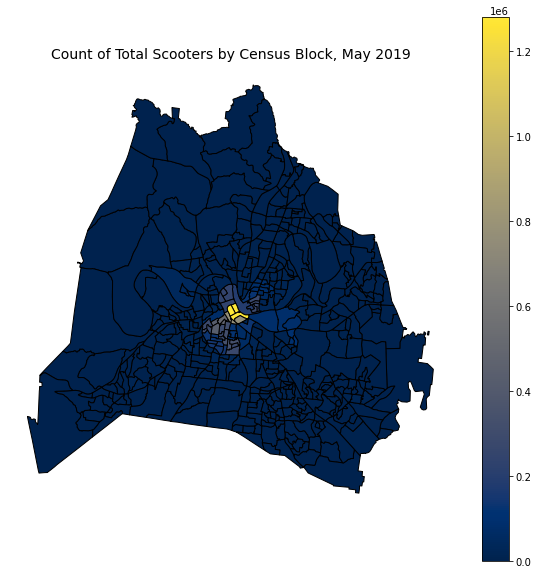

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
count_limes_census.plot(column = 'count_total_scooters',
                        cmap = 'cividis',
                        edgecolor = 'black',
                        ax = ax, legend=True)

plt.title('Count of Total Scooters by Census Block, May 2019', fontsize = 14)
ax.axis('off');

In [29]:
limes_by_census_100 = limes_by_census.loc[limes_by_census['chargelevel'] == 100.00]
limes_by_census_100.head()

,latitude,longitude,chargelevel,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long
1496,36.175269,-86.788036,100.0,POINT (-86.78804 36.17527),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1513,36.177023,-86.788648,100.0,POINT (-86.78865 36.17702),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1520,36.176961,-86.788620,100.0,POINT (-86.78862 36.17696),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1528,36.175725,-86.786760,100.0,POINT (-86.78676 36.17572),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
1532,36.175172,-86.788025,100.0,POINT (-86.78803 36.17517),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937


In [30]:
limes_by_census_100.value_counts('TRACTCE')

TRACTCE
019503    190426
019502    132387
019501    108571
016500     76740
017000     63384
           ...  
011600         2
010903         2
015637         1
011001         1
015624         1
Length: 87, dtype: int64

In [31]:
grouped_limes_by_census_100 = limes_by_census_100.groupby('TRACTCE').count()
grouped_limes_by_census_100 = grouped_limes_by_census_100.reset_index()[['TRACTCE','chargelevel']]
grouped_limes_by_census_100.columns=['TRACTCE', 'count_100_scooters']
grouped_limes_by_census_100.head()

,TRACTCE,count_100_scooters
0,010105,2375
1,010106,6
2,010202,38
3,010401,821
4,010403,4


In [32]:
count_limes_census = pd.merge(count_limes_census, grouped_limes_by_census_100,
                            on = 'TRACTCE', how = 'left')
count_limes_census.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long,geometry,count_total_scooters,count_100_scooters
0,47,037,015402,3,470370154023,1262130,0,+36.2085813,-086.6273518,"POLYGON ((-86.63448 36.21441, -86.63419 36.214...",6.0,NaN
1,47,037,010702,2,470370107022,630738,24479,+36.2510875,-086.7169230,"POLYGON ((-86.72306 36.24819, -86.72248 36.249...",31.0,2.0
2,47,037,010801,3,470370108013,1839358,0,+36.2711117,-086.7282208,"POLYGON ((-86.73751 36.26469, -86.73721 36.266...",62.0,NaN
3,47,037,011001,3,470370110013,1242812,0,+36.2299721,-086.7650660,"POLYGON ((-86.77301 36.22526, -86.77298 36.225...",5854.0,1.0
4,47,037,010904,2,470370109042,1378206,0,+36.2322472,-086.7780298,"POLYGON ((-86.78635 36.23788, -86.78634 36.237...",37.0,NaN


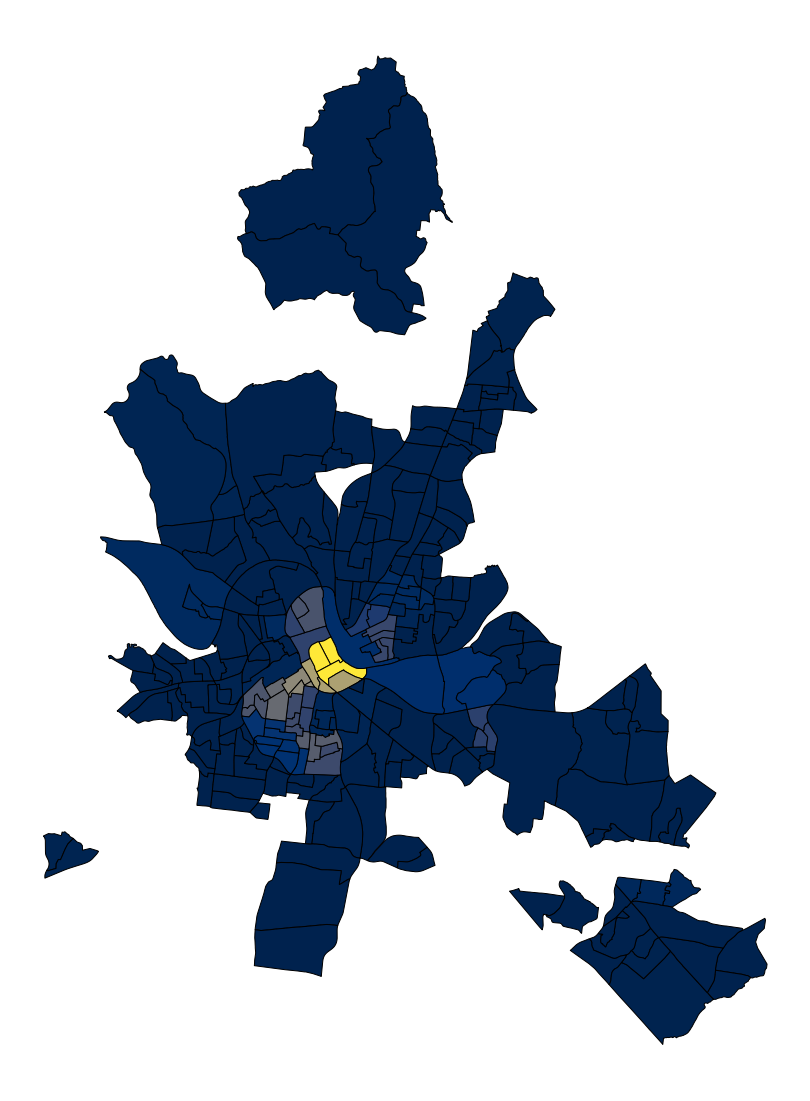

In [33]:
fig, ax = plt.subplots(figsize=(20,20))
count_limes_census.plot(column = 'count_100_scooters',
                        cmap = 'cividis',
                        edgecolor = 'black',
                        ax = ax)
ax.axis('off');

In [34]:
limes_by_census_0 = limes_by_census.loc[limes_by_census['chargelevel'] == 00.00]
limes_by_census_0.head()

,latitude,longitude,chargelevel,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long
11169221,36.175458,-86.786484,0.0,POINT (-86.78648 36.17546),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
11171576,36.175458,-86.786484,0.0,POINT (-86.78648 36.17546),95,47,037,019402,2,470370194022,1571215,186729,+36.1823028,-086.7870937
14018769,36.163318,-86.769580,0.0,POINT (-86.76958 36.16332),5,47,037,019300,1,470370193001,3166943,493345,+36.1717807,-086.7700864
14021123,36.163318,-86.769580,0.0,POINT (-86.76958 36.16332),5,47,037,019300,1,470370193001,3166943,493345,+36.1717807,-086.7700864
15021524,36.164173,-86.769550,0.0,POINT (-86.76955 36.16417),5,47,037,019300,1,470370193001,3166943,493345,+36.1717807,-086.7700864


In [35]:
grouped_limes_by_census_0 = limes_by_census_0.groupby('TRACTCE').count()
grouped_limes_by_census_0 = grouped_limes_by_census_0.reset_index()[['TRACTCE', 'chargelevel']]
grouped_limes_by_census_0.columns=['TRACTCE', 'count_0_scooters']
grouped_limes_by_census_0.head()

,TRACTCE,count_0_scooters
0,010801,2
1,011001,2
2,011600,773
3,011900,4
4,012600,8


In [36]:
count_limes_census = pd.merge(count_limes_census, grouped_limes_by_census_0,
                             on = 'TRACTCE', how = 'left')
count_limes_census.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long,geometry,count_total_scooters,count_100_scooters,count_0_scooters
0,47,037,015402,3,470370154023,1262130,0,+36.2085813,-086.6273518,"POLYGON ((-86.63448 36.21441, -86.63419 36.214...",6.0,NaN,NaN
1,47,037,010702,2,470370107022,630738,24479,+36.2510875,-086.7169230,"POLYGON ((-86.72306 36.24819, -86.72248 36.249...",31.0,2.0,NaN
2,47,037,010801,3,470370108013,1839358,0,+36.2711117,-086.7282208,"POLYGON ((-86.73751 36.26469, -86.73721 36.266...",62.0,NaN,2.0
3,47,037,011001,3,470370110013,1242812,0,+36.2299721,-086.7650660,"POLYGON ((-86.77301 36.22526, -86.77298 36.225...",5854.0,1.0,2.0
4,47,037,010904,2,470370109042,1378206,0,+36.2322472,-086.7780298,"POLYGON ((-86.78635 36.23788, -86.78634 36.237...",37.0,NaN,NaN


In [37]:
count_limes_census[['count_total_scooters', 'count_100_scooters', 'count_0_scooters']] = count_limes_census[['count_total_scooters', 'count_100_scooters', 'count_0_scooters']].fillna(0)

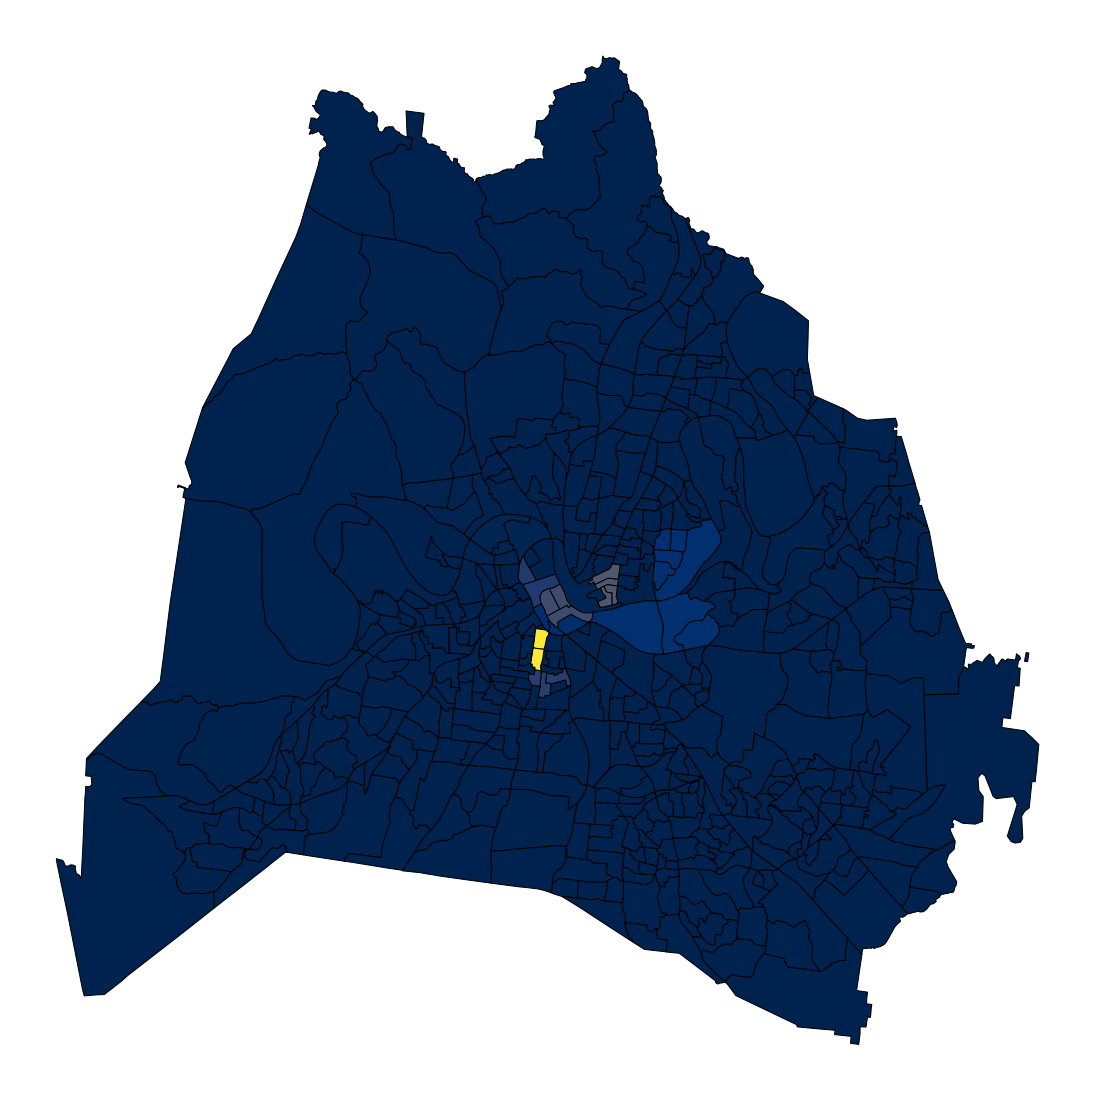

In [38]:
fig, ax = plt.subplots(figsize=(20,20))
count_limes_census.plot(column = 'count_0_scooters',
                        cmap = 'cividis',
                        edgecolor = 'black',
                        ax = ax, legend=True)
ax.axis('off');

count_limes_census['count_100_scooters'] = count_limes_census['count_100_scooters'].fillna(value=0, inplace=True)
count_limes_census.head()

In [39]:
count_limes_census.dtypes

STATEFP                   object
COUNTYFP                  object
TRACTCE                   object
BLKGRPCE                  object
GEOID                     object
ALAND                      int64
AWATER                     int64
lat                       object
long                      object
geometry                geometry
count_total_scooters     float64
count_100_scooters       float64
count_0_scooters         float64
dtype: object

In [40]:
count_limes_census['count_100_scooters'].astype('int')

0         0
1         2
2         0
3         1
4         0
       ... 
482      87
483      87
484       0
485    4357
486       0
Name: count_100_scooters, Length: 487, dtype: int32

In [41]:
count_limes_census.dtypes

STATEFP                   object
COUNTYFP                  object
TRACTCE                   object
BLKGRPCE                  object
GEOID                     object
ALAND                      int64
AWATER                     int64
lat                       object
long                      object
geometry                geometry
count_total_scooters     float64
count_100_scooters       float64
count_0_scooters         float64
dtype: object

In [42]:
count_limes_census['percent_100charge_scooters'] = (count_limes_census['count_100_scooters'] / 
                  count_limes_census['count_total_scooters']) * 100

In [43]:
count_limes_census['percent_0charge_scooters'] = (count_limes_census['count_0_scooters'] / 
                  count_limes_census['count_total_scooters']) * 100

In [44]:
count_limes_census.sort_values('percent_100charge_scooters', ascending=False)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,ALAND,AWATER,lat,long,geometry,count_total_scooters,count_100_scooters,count_0_scooters,percent_100charge_scooters,percent_0charge_scooters
293,47,037,010202,2,470370102022,27971087,77571,+36.3619781,-086.7746355,"POLYGON ((-86.82417 36.35040, -86.82416 36.350...",40.0,38.0,0.0,95.000000,0.0
294,47,037,010202,3,470370102023,22625552,0,+36.3466281,-086.7443805,"POLYGON ((-86.77483 36.33348, -86.77421 36.334...",40.0,38.0,0.0,95.000000,0.0
381,47,037,010202,1,470370102021,17798295,0,+36.3168958,-086.7814460,"POLYGON ((-86.82482 36.33225, -86.82480 36.332...",40.0,38.0,0.0,95.000000,0.0
63,47,037,015634,1,470370156341,1541863,0,+36.0316839,-086.5807140,"POLYGON ((-86.59018 36.02877, -86.58928 36.030...",408.0,333.0,0.0,81.617647,0.0
62,47,037,015634,2,470370156342,3100377,502128,+36.0434404,-086.5712878,"POLYGON ((-86.58638 36.03758, -86.58634 36.038...",408.0,333.0,0.0,81.617647,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,47,037,018410,1,470370184101,864014,0,+36.0706076,-086.9360424,"POLYGON ((-86.94183 36.06646, -86.94182 36.066...",0.0,0.0,0.0,NaN,NaN
424,47,037,018409,1,470370184091,1154462,0,+36.0661968,-086.9478905,"POLYGON ((-86.95448 36.06673, -86.95432 36.067...",0.0,0.0,0.0,NaN,NaN
437,47,037,015401,2,470370154012,5706426,0,+36.2192689,-086.6120625,"POLYGON ((-86.62552 36.22567, -86.62549 36.225...",0.0,0.0,0.0,NaN,NaN
438,47,037,015401,3,470370154013,1718248,0,+36.2238099,-086.5910963,"POLYGON ((-86.59766 36.21527, -86.59766 36.215...",0.0,0.0,0.0,NaN,NaN


In [45]:
count_limes_census.shape

(487, 15)

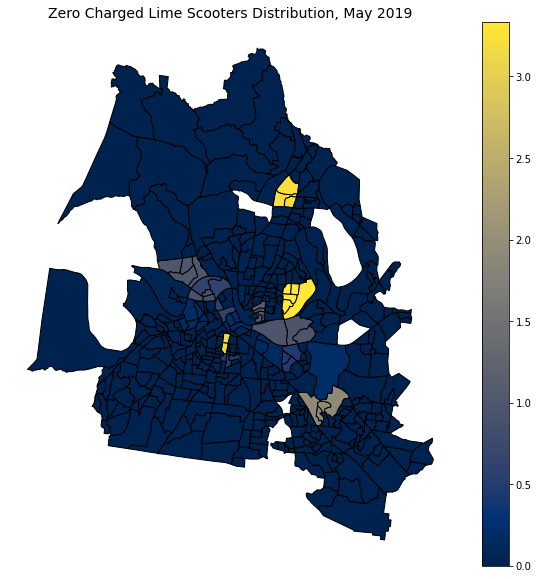

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
count_limes_census.plot(column = 'percent_0charge_scooters',
                        cmap = 'cividis',
                        edgecolor = 'black',
                        ax = ax, legend=True)
plt.title('Zero Charged Lime Scooters Distribution, May 2019', fontsize = 14)
ax.axis('off');

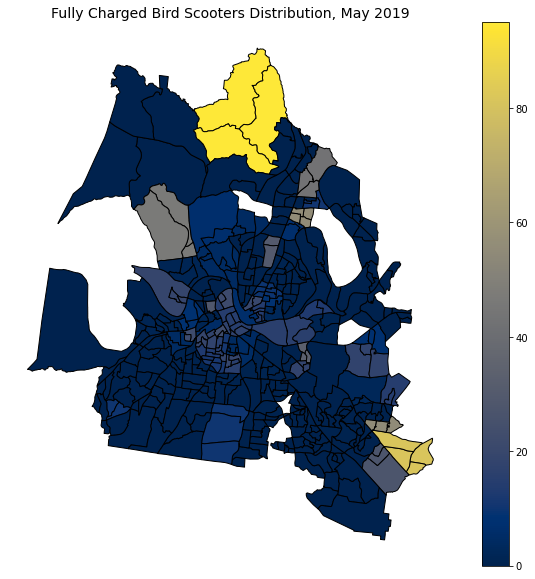

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
count_limes_census.plot(column = 'percent_100charge_scooters',
                        cmap = 'cividis',
                        edgecolor = 'black',
                        ax = ax, legend=True)
plt.title('Fully Charged Bird Scooters Distribution, May 2019', fontsize = 14)
ax.axis('off');